Test-driving vega package for Python

In [7]:
import numpy as np
import vega
import json
from vega import Vega

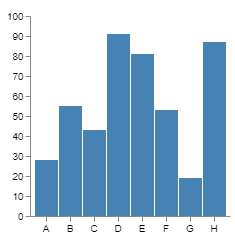

In [9]:
specV3=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v4.json",
  "width": 400,
  "height": 200,
  "padding": 5,

  "data": [
    {
      "name": "table",
      "values": [
        {"category": "A", "amount": 28},
        {"category": "B", "amount": 55},
        {"category": "C", "amount": 43},
        {"category": "D", "amount": 91},
        {"category": "E", "amount": 81},
        {"category": "F", "amount": 53},
        {"category": "G", "amount": 19},
        {"category": "H", "amount": 87}
      ]
    }
  ],

  "signals": [
    {
      "name": "tooltip",
      "value": {},
      "on": [
        {"events": "rect:mouseover", "update": "datum"},
        {"events": "rect:mouseout",  "update": "{}"}
      ]
    }
  ],

  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "category"},
      "range": "width",
      "padding": 0.05,
      "round": true
    },
    {
      "name": "yscale",
      "domain": {"data": "table", "field": "amount"},
      "nice": true,
      "range": "height"
    }
  ],

  "axes": [
    { "orient": "bottom", "scale": "xscale" },
    { "orient": "left", "scale": "yscale" }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data":"table"},
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "category"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "amount"},
          "y2": {"scale": "yscale", "value": 0}
        },
        "update": {
          "fill": {"value": "steelblue"}
        },
        "hover": {
          "fill": {"value": "red"}
        }
      }
    },
    {
      "type": "text",
      "encode": {
        "enter": {
          "align": {"value": "center"},
          "baseline": {"value": "bottom"},
          "fill": {"value": "#333"}
        },
        "update": {
          "x": {"scale": "xscale", "signal": "tooltip.category", "band": 0.5},
          "y": {"scale": "yscale", "signal": "tooltip.amount", "offset": -2},
          "text": {"signal": "tooltip.amount"},
          "fillOpacity": [
            {"test": "datum === tooltip", "value": 0},
            {"value": 1}
          ]
        }
      }
    }
  ]
}
""")
vega4view=dict(specV3)
#vega4view['config']=json.loads(Config)
vega4view['width']=200
vega4view['height']=200
Vega(vega4view)

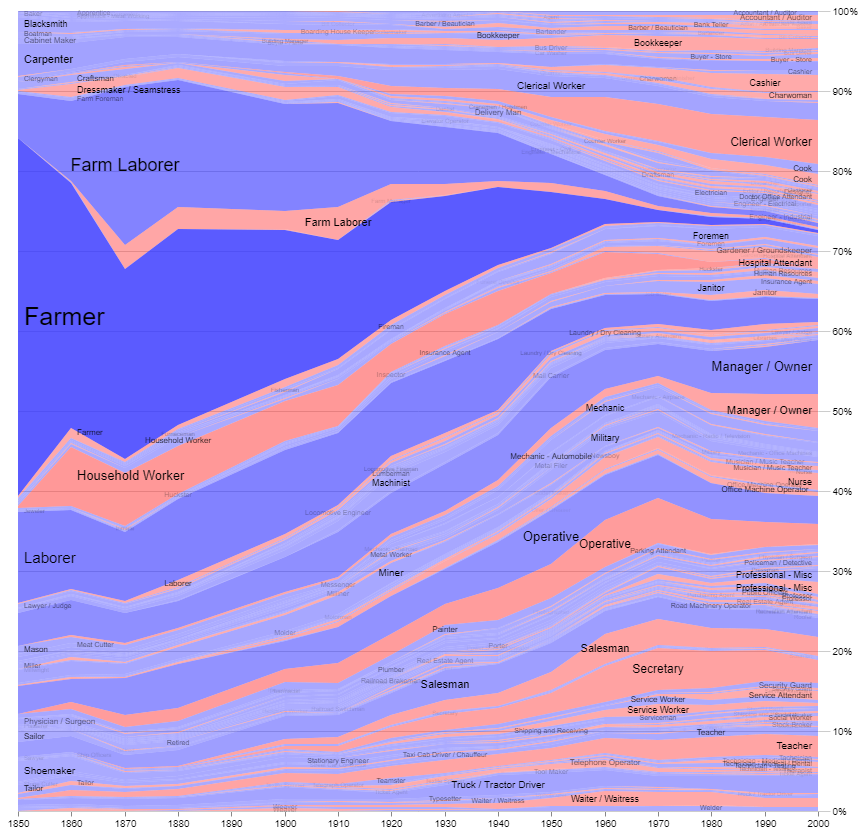

In [13]:
specV3=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v4.json",
  "width": 800,
  "height": 500,
  "padding": 5,

  "signals": [
    {
      "name": "sex", "value": "all",
      "bind": {"input": "radio", "options": ["men", "women", "all"]}
    },
    {
      "name": "query", "value": "",
      "on": [
        {"events": "area:click!", "update": "datum.job"},
        {"events": "dblclick!", "update": "''"}
      ],
      "bind": {"input": "text", "placeholder": "search", "autocomplete": "off"}
    }
  ],

  "data": [
    {
      "name": "jobs",
      "url": "https://raw.githubusercontent.com/vega/vega-datasets/gh-pages/data/jobs.json",
      "transform": [
        {
          "type": "filter",
          "expr": "(sex === 'all' || datum.sex === sex) && (!query || test(regexp(query,'i'), datum.job))"
        },
        {
          "type": "stack",
          "field": "perc",
          "groupby": ["year"],
          "sort": {
            "field": ["job", "sex"],
            "order": ["descending", "descending"]
          }
        }
      ]
    },
    {
      "name": "series",
      "source": "jobs",
      "transform": [
        {
          "type": "aggregate",
          "groupby": ["job", "sex"],
          "fields": ["perc", "perc"],
          "ops": ["sum", "argmax"],
          "as": ["sum", "argmax"]
        }
      ]
    }
  ],

  "scales": [
    {
      "name": "x",
      "type": "linear",
      "range": "width",
      "zero": false, "round": true,
      "domain": {"data": "jobs", "field": "year"}
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height", "round": true, "zero": true,
      "domain": {"data": "jobs", "field": "y1"}
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": ["men", "women"],
      "range": ["#33f", "#f33"]
    },
    {
      "name": "alpha",
      "type": "linear", "zero": true,
      "domain": {"data": "series", "field": "sum"},
      "range": [0.4, 0.8]
    },
    {
      "name": "font",
      "type": "sqrt",
      "range": [0, 20], "round": true, "zero": true,
      "domain": {"data": "series", "field": "argmax.perc"}
    },
    {
      "name": "opacity",
      "type": "quantile",
      "range": [0, 0, 0, 0, 0, 0.1, 0.2, 0.4, 0.7, 1.0],
      "domain": {"data": "series", "field": "argmax.perc"}
    },
    {
      "name": "align",
      "type": "quantize",
      "range": ["left", "center", "right"], "zero": false,
      "domain": [1730, 2130]
    },
    {
      "name": "offset",
      "type": "quantize",
      "range": [6, 0, -6], "zero": false,
      "domain": [1730, 2130]
    }
  ],

  "axes": [
    {
      "orient": "bottom", "scale": "x", "format": "d", "tickCount": 15
    },
    {
      "orient": "right", "scale": "y", "format": "%",
      "grid": true, "domain": false, "tickSize": 12,
      "encode": {
        "grid": {"enter": {"stroke": {"value": "#ccc"}}},
        "ticks": {"enter": {"stroke": {"value": "#ccc"}}}
      }
    }
  ],

  "marks": [
    {
      "type": "group",
      "from": {
        "data": "series",
        "facet": {
          "name": "facet",
          "data": "jobs",
          "groupby": ["job", "sex"]
        }
      },

      "marks": [
        {
          "type": "area",
          "from": {"data": "facet"},
          "encode": {
            "update": {
              "x": {"scale": "x", "field": "year"},
              "y": {"scale": "y", "field": "y0"},
              "y2": {"scale": "y", "field": "y1"},
              "fill": {"scale": "color", "field": "sex"},
              "fillOpacity": {"scale": "alpha", "field": {"parent": "sum"}}
            },
            "hover": {
              "fillOpacity": {"value": 0.2}
            }
          }
        }
      ]
    },
    {
      "type": "text",
      "from": {"data": "series"},
      "interactive": false,
      "encode": {
        "update": {
          "x": {"scale": "x", "field": "argmax.year"},
          "dx": {"scale": "offset", "field": "argmax.year"},
          "y": {"signal": "scale('y', 0.5 * (datum.argmax.y0 + datum.argmax.y1))"},
          "fill": {"value": "#000"},
          "fillOpacity": {"scale": "opacity", "field": "argmax.perc"},
          "fontSize": {"scale": "font", "field": "argmax.perc", "offset": 5},
          "text": {"field": "job"},
          "align": {"scale": "align", "field": "argmax.year"},
          "baseline": {"value": "middle"}
        }
      }
    }
  ]
}
""")
vega4view=dict(specV3)
#vega4view['config']=json.loads(Config)
vega4view['width']=800
vega4view['height']=800
Vega(vega4view)

Widget code taken directly from Resource Watch

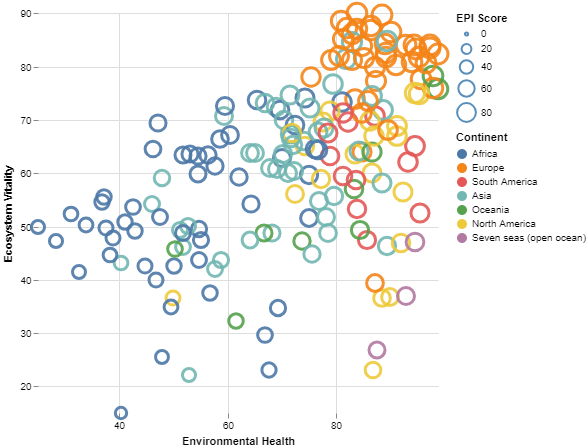

In [19]:
specV3=json.loads("""
{
  "autosize": {
    "contains": "padding",
    "resize": true,
    "type": "pad"
  },
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {
          "events": "@cell:mouseover",
          "update": "datum"
        },
        {
          "events": "@cell:mouseout",
          "update": "null"
        }
      ]
    }
  ],
  "data": [
    {
      "format": {
        "property": "rows",
        "type": "json"
      },
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT wri.cartodb_id, wri.the_geom_webmercator, data.rw_country_name, wri.continent, data._2016_epi_score, data._10_year_percent_change, data.environmental_health, data.ecosystem_vitality FROM soc_021_environmental_performance_index data LEFT OUTER JOIN wri_countries_a wri ON wri.iso_a3=data.rw_country_code WHERE wri.cartodb_id IS NOT NULL AND data._2016_epi_score IS NOT NULL",
      "name": "table"
    }
  ],
  "scales": [
    {
      "range": "width",
      "domain": {
        "field": "environmental_health",
        "data": "table"
      },
      "zero": false,
      "nice": false,
      "round": true,
      "type": "linear",
      "name": "x"
    },
    {
      "range": "height",
      "domain": {
        "field": "ecosystem_vitality",
        "data": "table"
      },
      "zero": false,
      "nice": false,
      "round": true,
      "type": "linear",
      "name": "y"
    },
    {
      "range": [
        10,
        400
      ],
      "domain": [
        27,
        91
      ],
      "zero": true,
      "nice": false,
      "round": true,
      "type": "linear",
      "name": "size"
    },
    {
      "range": "category",
      "domain": {
        "field": "continent",
        "data": "table"
      },
      "type": "ordinal",
      "name": "color"
    }
  ],
  "axes": [
    {
      "title": "Environmental Health",
      "tickCount": 5,
      "orient": "bottom",
      "domain": false,
      "grid": true,
      "scale": "x",
      "zindex": 0
    },
    {
      "title": "Ecosystem Vitality",
      "titlePadding": 5,
      "orient": "left",
      "domain": false,
      "grid": true,
      "scale": "y",
      "zindex": 0
    }
  ],
  "marks": [
    {
      "encode": {
        "update": {
          "fill": {
            "value": "transparent"
          },
          "stroke": {
            "field": "continent",
            "scale": "color"
          },
          "opacity": {
            "value": 0.9
          },
          "strokeWidth": {
            "value": 3
          },
          "shape": {
            "value": "circle"
          },
          "size": {
            "field": "_2016_epi_score",
            "scale": "size"
          },
          "y": {
            "field": "ecosystem_vitality",
            "scale": "y"
          },
          "x": {
            "field": "environmental_health",
            "scale": "x"
          }
        }
      },
      "from": {
        "data": "table"
      },
      "type": "symbol",
      "name": "marks"
    }
  ],
  "legends": [
    {
      "size": "size",
      "title": "EPI Score",
      "format": "s",
      "encode": {
        "symbols": {
          "update": {
            "strokeWidth": {
              "value": 2
            },
            "opacity": {
              "value": 0.9
            },
            "stroke": {
              "value": "#4682b4"
            },
            "shape": {
              "value": "circle"
            }
          }
        },
        "hover": { "fill": {"value": "red"} }
      }
    },
    {
      "title": "Continent",
      "fill": "color",
      "orient": "right"
    }
  ],
  "interaction_config": [
    {
      "name": "tooltip",
      "config": {
        "fields": [
          {
            "property": "Country",
            "column": "rw_country_name",
            "type": "string"
          },
          {
            "property": "Continent",
            "column": "continent",
            "type": "string"
          },
          {
            "property": "Environmental Health",
            "column": "environmental_health",
            "type": "number",
            "format": ".4s"
          },
          {
            "property": "Ecosystem Vitality",
            "column": "ecosystem_vitality",
            "type": "number",
            "format": ".4s"
          },
          {
            "property": "Environmental Performance Index",
            "column": "_2016_epi_score",
            "type": "number",
            "format": ".4s"
          }
        ]
      }
    }
  ]
}
""")
vega4view=dict(specV3)
#vega4view['config']=json.loads(Config)
vega4view['width']=400
vega4view['height']=400
Vega(vega4view)

Same code modified to run in standard Vega editor

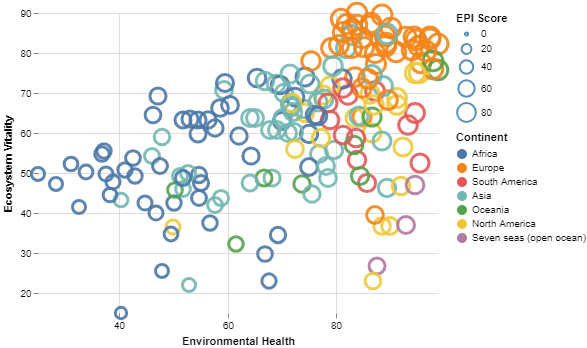

In [20]:
specV3=json.loads("""
{
  "width": 400,
  "height": 400,
  "autosize": {
    "contains": "padding",
    "resize": true,
    "type": "pad"
  },
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {
          "events": "@cell:mouseover",
          "update": "datum"
        },
        {
          "events": "@cell:mouseout",
          "update": "null"
        }
      ]
    }
  ],
  "data": [
    {
      "format": {
        "property": "rows",
        "type": "json"
      },
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT wri.cartodb_id, wri.the_geom_webmercator, data.rw_country_name, wri.continent, data._2016_epi_score, data._10_year_percent_change, data.environmental_health, data.ecosystem_vitality FROM soc_021_environmental_performance_index data LEFT OUTER JOIN wri_countries_a wri ON wri.iso_a3=data.rw_country_code WHERE wri.cartodb_id IS NOT NULL AND data._2016_epi_score IS NOT NULL",
      "name": "table"
    }
  ],
  "scales": [
    {
      "range": "width",
      "domain": {
        "field": "environmental_health",
        "data": "table"
      },
      "zero": false,
      "nice": false,
      "round": true,
      "type": "linear",
      "name": "x"
    },
    {
      "range": "height",
      "domain": {
        "field": "ecosystem_vitality",
        "data": "table"
      },
      "zero": false,
      "nice": false,
      "round": true,
      "type": "linear",
      "name": "y"
    },
    {
      "range": [
        10,
        400
      ],
      "domain": [
        27,
        91
      ],
      "zero": true,
      "nice": false,
      "round": true,
      "type": "linear",
      "name": "size"
    },
    {
      "range": "category",
      "domain": {
        "field": "continent",
        "data": "table"
      },
      "type": "ordinal",
      "name": "color"
    }
  ],
  "axes": [
    {
      "title": "Environmental Health",
      "tickCount": 5,
      "orient": "bottom",
      "domain": false,
      "grid": true,
      "scale": "x",
      "zindex": 0
    },
    {
      "title": "Ecosystem Vitality",
      "titlePadding": 5,
      "orient": "left",
      "domain": false,
      "grid": true,
      "scale": "y",
      "zindex": 0
    }
  ],
  "marks": [
    {
      "encode": {
        "update": {
          "fill": {
            "value": "transparent"
          },
          "stroke": {
            "field": "continent",
            "scale": "color"
          },
          "opacity": {
            "value": 0.9
          },
          "strokeWidth": {
            "value": 3
          },
          "shape": {
            "value": "circle"
          },
          "size": {
            "field": "_2016_epi_score",
            "scale": "size"
          },
          "y": {
            "field": "ecosystem_vitality",
            "scale": "y"
          },
          "x": {
            "field": "environmental_health",
            "scale": "x"
          }
        },
        "hover": {
          "fill": {"value": "gray"},
          "opacity": 1.0,
          "tooltip": {
            "signal": "{'Country':datum.rw_country_name, 'Continent':datum.continent, 'Environmental Health':datum.environmental_health, 'Ecosystem Vitality':datum.ecosystem_vitality, 'Enviromental Performance':datum._2016_epi_score}"
          }
        }
      },
      "from": {
        "data": "table"
      },
      "type": "symbol",
      "name": "marks"
    }
  ],
  "legends": [
    {
      "size": "size",
      "title": "EPI Score",
      "format": "s",
      "encode": {
        "symbols": {
          "update": {
            "strokeWidth": {
              "value": 2
            },
            "opacity": {
              "value": 0.9
            },
            "stroke": {
              "value": "#4682b4"
            },
            "shape": {
              "value": "circle"
            }
          }
        }
      }
    },
    {
      "title": "Continent",
      "fill": "color",
      "orient": "right"
    }
  ]
}
""")
vega4view=dict(specV3)
#vega4view['config']=json.loads(Config)
vega4view['width']=400
vega4view['height']=300
Vega(vega4view)

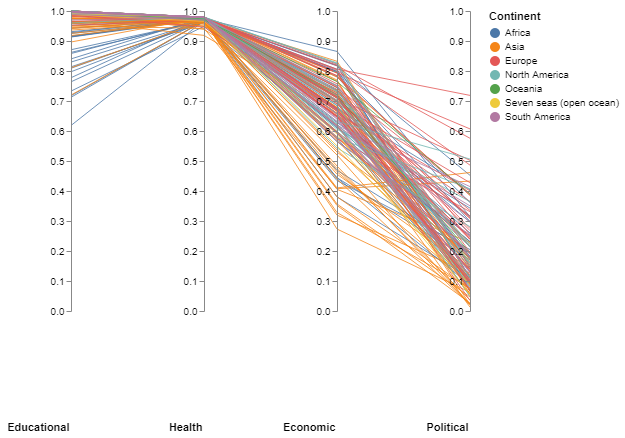

In [17]:
specV3=json.loads("""
{
  "width": 600,
  "height": 400,
  "padding": 5,
  "config": {
    "axisY": {
      "titleX": -2,
      "titleY": 410,
      "titleAngle": 0,
      "titleAlign": "right",
      "titleBaseline": "top"
    }
  },
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {
          "events": "@cell:mouseover",
          "update": "datum"
        },
        {
          "events": "@cell:mouseout",
          "update": "null"
        }
      ]
    }
  ],
  "data": [
    {
      "name": "ggi",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT data.rw_country_name, wri.continent, data.economic_participation_and_opportunity_subindex_score AS economic_participation_and_opportunity, data.educational_attainment_subindex_score AS educational_attainment, data.health_and_survival_subindex_score AS health_and_survival, data.political_empowerment_subindex_score AS political_empowerment, data.overall_index_score AS overall FROM soc_026_gender_gap_index_1 data LEFT OUTER JOIN wri_countries_a wri ON data.rw_country_name=wri.name WHERE data.overall_index_score IS NOT NULL ORDER BY wri.continent ASC, data.rw_country_name ASC",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": []
    },
    {
      "name": "fields",
      "values": [
        "educational_attainment",
        "health_and_survival",
        "economic_participation_and_opportunity",
        "political_empowerment"
      ]
    }
  ],
  "scales": [
    {
      "name": "ord",
      "type": "point",
      "range": "width",
      "round": true,
      "domain": {
        "data": "fields",
        "field": "data"
      }
    },
    {
      "name": "economic_participation_and_opportunity",
      "type": "linear",
      "range": "height",
      "zero": false,
      "nice": true,
      "domain": [
        0,
        1
      ]
    },
    {
      "name": "educational_attainment",
      "type": "linear",
      "range": "height",
      "zero": false,
      "nice": true,
      "domain": [
        0,
        1
      ]
    },
    {
      "name": "health_and_survival",
      "type": "linear",
      "range": "height",
      "zero": false,
      "nice": true,
      "domain": [
        0,
        1
      ]
    },
    {
      "name": "political_empowerment",
      "type": "linear",
      "range": "height",
      "zero": false,
      "nice": true,
      "domain": [
        0,
        1
      ]
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {
        "data": "ggi",
        "field": "continent"
      },
      "range": "category"
    }
  ],
  "axes": [
    {
      "orient": "left",
      "zindex": 1,
      "scale": "economic_participation_and_opportunity",
      "title": "Economic",
      "offset": {
        "scale": "ord",
        "value": "economic_participation_and_opportunity",
        "mult": -1,
        "grid": "false"
      }
    },
    {
      "orient": "left",
      "zindex": 1,
      "scale": "educational_attainment",
      "title": "Educational",
      "offset": {
        "scale": "ord",
        "value": "educational_attainment",
        "mult": -1,
        "grid": "false"
      }
    },
    {
      "orient": "left",
      "zindex": 1,
      "scale": "health_and_survival",
      "title": "Health",
      "offset": {
        "scale": "ord",
        "value": "health_and_survival",
        "mult": -1,
        "grid": "false"
      }
    },
    {
      "orient": "left",
      "zindex": 1,
      "scale": "political_empowerment",
      "title": "Political",
      "offset": {
        "scale": "ord",
        "value": "political_empowerment",
        "mult": -1,
        "grid": "false"
      }
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "data": "ggi"
      },
      "marks": [
        {
          "type": "line",
          "from": {
            "data": "fields"
          },
          "encode": {
            "enter": {
              "x": {
                "scale": "ord",
                "field": "data"
              },
              "y": {
                "scale": {
                  "datum": "data"
                },
                "field": {
                  "parent": {
                    "datum": "data"
                  }
                }
              },
              "stroke": {
                "scale": "color",
                "field": {
                  "parent": "continent"
                }
              },
              "strokeWidth": {
                "value": 0.9
              },
              "strokeOpacity": {
                "value": 0.9
              }
            }
          }
        }
      ]
    }
  ],
  "legends": [
    {
      "title": "Continent",
      "fill": "color",
      "orient": "right"
    }
  ],
  "interaction_config": [
    {
      "name": "tooltip",
      "config": {
        "fields": [
          {
            "property": "Country",
            "column": "rw_country_name",
            "type": "string"
          },
          {
            "property": "Continent",
            "column": "continent",
            "type": "string"
          }
        ]
      }
    }
  ]
}
""")
vega4view=dict(specV3)
#vega4view['config']=json.loads(Config)
vega4view['width']=400
vega4view['height']=300
Vega(vega4view)